In [115]:
import numpy as np # linear algebra
import os
import pandas as pd
import matplotlib.pyplot as plt
import copy
import tensorflow_datasets as tfds
import cv2
import sklearn
import sklearn.datasets
import sklearn.linear_model
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [116]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [117]:
data = np.array(data)
m, n = data.shape
print(data.shape)
np.random.shuffle(data) # shuffle before splitting into dev and training sets

test_data = data[0:1000].T
Y_test = data_dev[0]
X_test = data_dev[1:n]
X_test = X_dev / 255.

train_data = data[1000:m].T
Y_train = train_data[0]
X_train = train_data[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

(42000, 785)


In [118]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)

(784, 41000)
(41000,)
(784, 1000)


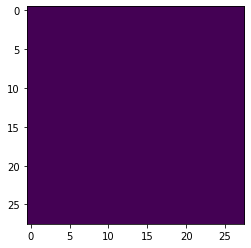

9


In [120]:
index = 2
X_test = X_test.T.reshape(-1,28,28)
plt.imshow(X_test[index])
plt.show()
print(Y_test[index])

In [107]:
# new_size = img_size**2
# X = data.reshape(-1,new_size).T
# print(X.shape)
# Y = labels.reshape(-1,1).T
# print(Y.shape)
# print(Y)

In [58]:
n_x = X_train.shape[0]
n_h = 10
n_y = Y_train.shape[0]

print(n_x,n_h,n_y)

784 10 41000


In [70]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5

    params = (W1,b1,W2,b2)
    return params

In [71]:
def ReLU(Z):
    return np.maximum(Z,0)

def sigmoid(Z):
    return 1/(1+np.exp(-Z))

def ReLU_der(Z):
    return Z>0

def softmax(Z):
    #since i'm confused b/w tanh and softmax so..
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [85]:
def f_prop(X,params):
    W1,b1,W2,b2 = params

    Z1 = np.dot(W1,X) + b1
    a1 = ReLU(Z1)
    Z2 = np.dot(W2,a1) + b2
    a2 = softmax(Z2)

#   print(a2.shape)

    cache = (Z1,a1,Z2,a2)
    return cache

def b_prop(cache,W2,Y,X):
    #m = Y.shape[1]
    Z1, a1, Z2, a2 = cache

    one_hot_Y = one_hot(Y)
    #implement derivateives
    dZ2 = a2 - one_hot_Y
    dW2 = (1/m) * np.dot(dZ2,a1.T)
    db2 = (1/m) * np.sum(dZ2)

    dZ1 = np.dot(W2.T,dZ2) * ReLU_der(Z1)
    dW1 = (1/m) * np.dot(dZ1,X.T)
    db1 = (1/m) * np.sum(dZ1)

    der = (dW1,db1,dW2,db2)
    return der

In [86]:
def update_params(params,der,alpha):
    W1,b1,W2,b2 = params
    dW1,db1,dW2,db2 = der
    W1 = W1 - alpha*dW1
    b1 = b1 - alpha*db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2

    params = (W1,b1,W2,b2)
    return params

In [87]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [81]:
def nn(X,Y,iterations,alpha):
    params = init_params()

    for i in range(iterations):
        cache = f_prop(X,params)
    
        Z1,a1,Z2,a2 = cache
        W1,b1,W2,b2 = params
        der = b_prop(cache,W2,Y,X)
        # cost = costf(a2,Y)
        params = update_params(params,der,alpha)
        if (i%10 == 0):
            print("Iteration: ", i)
            predictions = get_predictions(a2)
            print(get_accuracy(predictions, Y))
    return params

In [88]:
gradient_desc = nn(X_train,Y_train,500,0.10)

Iteration:  0
[5 2 5 ... 2 5 0] [3 8 3 ... 9 5 1]
0.08790243902439024
Iteration:  10
[5 8 5 ... 7 5 1] [3 8 3 ... 9 5 1]
0.20568292682926828
Iteration:  20
[5 8 9 ... 7 5 1] [3 8 3 ... 9 5 1]
0.3101951219512195
Iteration:  30
[5 8 9 ... 7 5 1] [3 8 3 ... 9 5 1]
0.3963170731707317
Iteration:  40
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.4601707317073171
Iteration:  50
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.515
Iteration:  60
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.5610731707317074
Iteration:  70
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.5999512195121951
Iteration:  80
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.6335609756097561
Iteration:  90
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.6625365853658537
Iteration:  100
[3 8 9 ... 9 5 1] [3 8 3 ... 9 5 1]
0.6875121951219512
Iteration:  110
[3 8 3 ... 9 5 1] [3 8 3 ... 9 5 1]
0.707170731707317
Iteration:  120
[3 8 3 ... 9 5 1] [3 8 3 ... 9 5 1]
0.7239024390243902
Iteration:  130
[3 8 3 ... 9 5 1] [3 8 3 ... 9 5 1]
0.7372195121951219
Iteration:  140
[3 8 3 ... 9 